In [4]:
# Wczytanie danych
from keras.applications import MobileNet
mobilenet = MobileNet (weights ="imagenet")

In [5]:
# Sprawdzenie działania na przykładzie zdjęcia
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

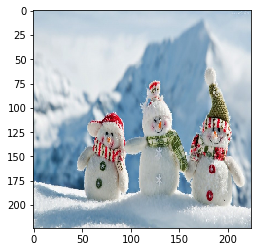

In [11]:
filename = "zima1.jpg"

orginal = load_img(filename, target_size=(224, 224))
plt.imshow(orginal)
plt.show()

numpy_image = img_to_array(orginal)
image_batch = np.expand_dims(numpy_image, axis=0)

In [12]:
# Preprocesowanie
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.mobilenet import preprocess_input

processed_image = preprocess_input(image_batch.copy())
predictions = mobilenet.predict(processed_image)
label = decode_predictions(predictions)
print(label)

[[('n04423845', 'thimble', 0.19657126), ('n01514859', 'hen', 0.15042463), ('n02165456', 'ladybug', 0.0703213), ('n02843684', 'birdhouse', 0.058758702), ('n03026506', 'Christmas_stocking', 0.051296216)]]


In [23]:
#Import modelu jeszcze raz bez ostatniej warstwy
from keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNet(weights="imagenet", include_top = False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
preds = Dense(4, activation="softmax")(x)

In [24]:
# Budowa nowego modelu
from keras.models import Model

model = Model(inputs=base_model.input, output=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

e:\kurs_ml_python36\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [25]:
# Trenowanie tylko ostatnich warst
for layer in model.layers[:-5]:
    layer.trainable = False

In [26]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagen = IDG(preprocessing_function = preprocess_input)
train_generator = train_datagen.flow_from_directory(
    './PoryRoku/',
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 32,
    class_mode = "categorical",
    shuffle = True
)

Found 372 images belonging to 4 classes.


In [27]:
# Kompilowanie modelu
model.compile(
    optimizer = "Adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [34]:
# Trenowanie
model.fit_generator(
    generator = train_generator,
    steps_per_epoch = train_generator.n/train_generator.batch_size,
    epochs = 2
)

Epoch 1/2
12/11 [==============================] - 20s 2s/step - loss: 0.0953 - acc: 0.9687
Epoch 2/2
12/11 [==============================] - 20s 2s/step - loss: 0.1167 - acc: 0.9501


In [35]:
print(train_generator.class_indices)

{'Jesien': 0, 'Lato': 1, 'Wiosna': 2, 'Zima': 3}


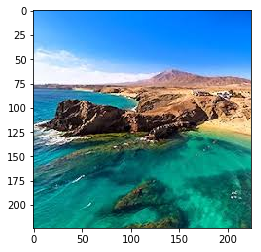

1


In [37]:
# Sprawdzenie ręczne
filename = "9k.jpg"

orginal = load_img(filename, target_size=(224, 224))
plt.imshow(orginal)
plt.show()

numpy_image = img_to_array(orginal)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)
print(np.argmax(predictions))